In [1]:
#Esercizi sul database 'titanic'
import pandas as pd   #Importo pandas
df = pd.read_csv('C:\\Users\\alice\\Downloads\\Titanic-Dataset.csv')   #Importo csv
df.head()   #Vedo prime 5 righe

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#Cerco quanti ponti ci sono sulla nave
#La prima lettera di ogni valore nella colonna 'Cabin' rappresenta un tipo di ponte presente sulla nave.
cabins = df['Cabin'].dropna()   #Tolgo i NaN da 'Cabin'
ponti = cabins.str[0]   #Estraggo la prima lettera di ogni valore in 'Cabin'
num_ponti = ponti.nunique()   #Conto i ponti unici
print("Ponti trovati:", ponti.unique())   #Vedo quali tipi di ponte ci sono sulla nave
print(f"Numero di ponti diversi sulla nave: {num_ponti}")    #Conto quanti tipi di ponte ci sono sulla nave

Ponti trovati: ['C' 'E' 'G' 'D' 'A' 'B' 'F' 'T']
Numero di ponti diversi sulla nave: 8


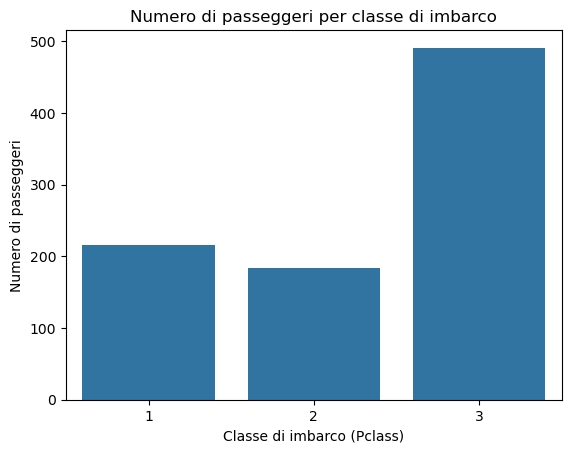

In [4]:
#Creo un grafico che mostra il numero di passeggeri di ogni classe 'PClass'
import seaborn as sns   #Importo seaborn
import matplotlib.pyplot as plt   #Importo grafico

sns.countplot(data=df, x='Pclass')   #Creo grafico a barre

plt.title('Numero di passeggeri per classe di imbarco')
plt.xlabel('Classe di imbarco (Pclass)')
plt.ylabel('Numero di passeggeri')

plt.show()

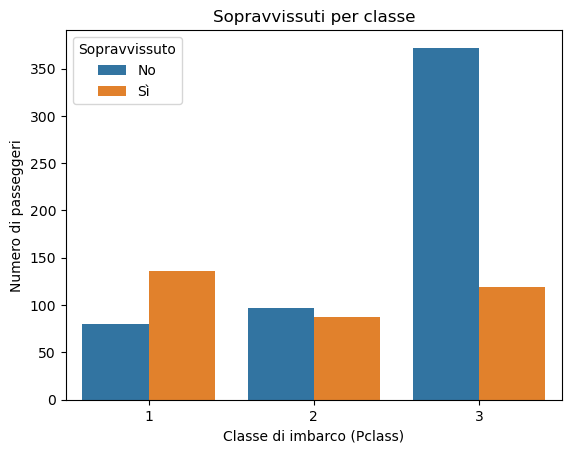

In [5]:
#Stessa cosa per la colonna 'Survived'
sns.countplot(data=df, x='Pclass', hue='Survived')   #Creo grafico a barre con due label per i sopravvissuti (Sì e No)

plt.title('Sopravvissuti per classe')
plt.xlabel('Classe di imbarco (Pclass)')
plt.ylabel('Numero di passeggeri')
plt.legend(title='Sopravvissuto', labels=['No', 'Sì'])

plt.show()

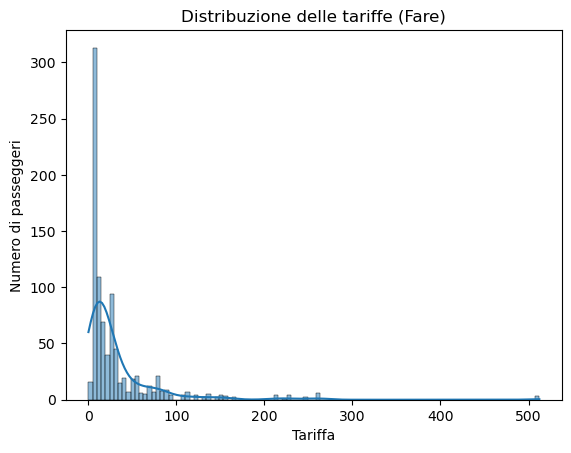

In [6]:
#Visualizzo la distribuzione delle tariffe ('Fare')
sns.histplot(data=df, x='Fare', kde=True)   #Creo un istogramma con curva

plt.title('Distribuzione delle tariffe (Fare)')
plt.xlabel('Tariffa')
plt.ylabel('Numero di passeggeri')

plt.show()

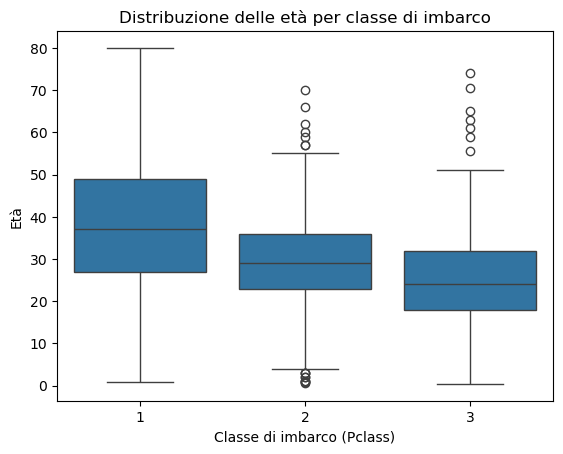

In [8]:
#Cerco la distribuzione dell'età ('Age') rispetto alla classe d'imbarco ('PClass') con un boxplot
sns.boxplot(data=df, x='Pclass', y='Age')   #Creo boxplot

plt.title('Distribuzione delle età per classe di imbarco')
plt.xlabel('Classe di imbarco (Pclass)')
plt.ylabel('Età')

plt.show()

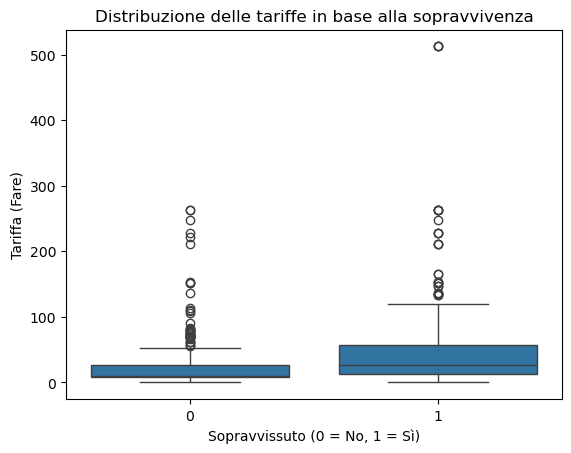

In [9]:
#Stesso boxplot ma per 'Fare' e 'Survived'
sns.boxplot(data=df, x='Survived', y='Fare')

plt.title('Distribuzione delle tariffe in base alla sopravvivenza')
plt.xlabel('Sopravvissuto (0 = No, 1 = Sì)')
plt.ylabel('Tariffa (Fare)')

plt.show()

In [ ]:
#Deduzione: i sopravvissuti hanno le tariffe più alte -> le classi migliori hanno più possibilità di avere sopravvissuti

In [10]:
#Esercizi sul dataset stockdata.csv
import pandas as pd

url = "https://raw.githubusercontent.com/plotly/datasets/master/stockdata.csv"  #Scarico direttamente il file in pandas
df = pd.read_csv(url)


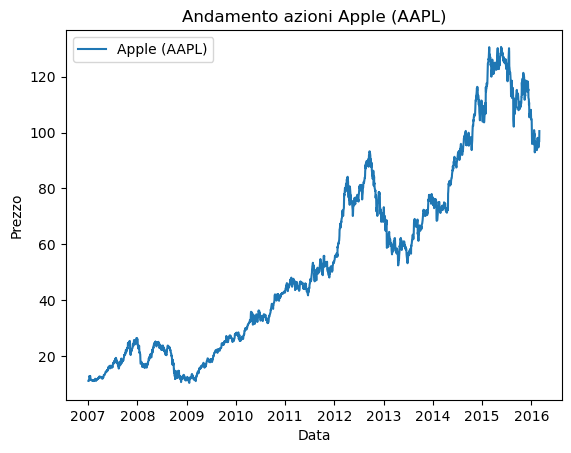

In [12]:
#Visualizzo l'andamento delle azioni Apple
import matplotlib.pyplot as plt   #Importo grafico

df['Date'] = pd.to_datetime(df['Date'])   #Converto la colonna 'Date' in formato 'datetime'

plt.plot(df['Date'], df['AAPL'], label='Apple (AAPL)')   #Filtro per Apple all'interno del grafico

plt.title('Andamento azioni Apple (AAPL)')   #Creo il grafico
plt.xlabel('Data')
plt.ylabel('Prezzo')
plt.legend()
plt.show()


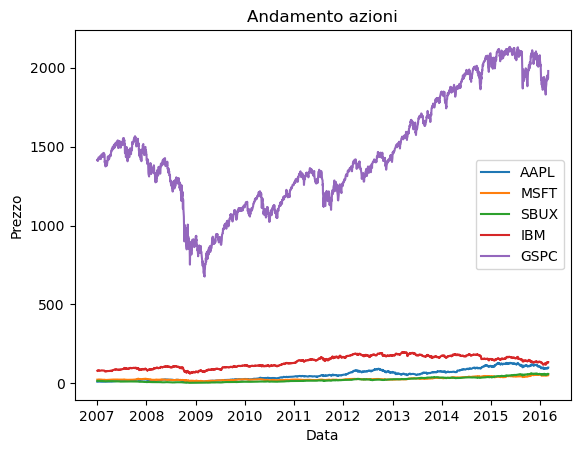

In [14]:
#Visualizzo l'andamento di tutte le azioni
for col in ['AAPL', 'MSFT', 'SBUX', 'IBM', 'GSPC']:   #Scorro la lista delle colonne con un ciclo
    plt.plot(df['Date'], df[col], label=col)   #Per ogni iterazione, disegno una linea con 'Date' sull'asse x e i valori delle colonne sull'asse y

plt.title('Andamento azioni')   #Creo il grafico
plt.xlabel('Data')
plt.ylabel('Prezzo')
plt.legend()
plt.show()


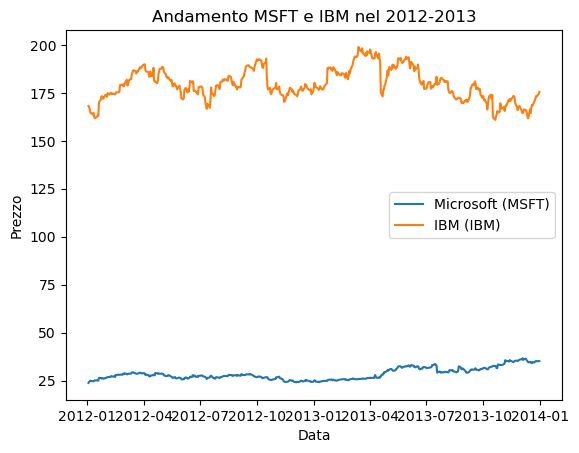

In [15]:
#Visualizzo l'andamento di Microsoft ("MSFT") e IBM ("IBM") negli anni 2012 e 2013
mask = (df['Date'].dt.year >= 2012) & (df['Date'].dt.year <= 2013)   #Filtro per data
df_filtered = df.loc[mask]

#Disegno l'andamento del prezzo delle azioni Microsoft (MSFT) sull'asse y, rispetto alle date filtrate (df_filtered['Date']) sull'asse x.
plt.plot(df_filtered['Date'], df_filtered['MSFT'], label='Microsoft (MSFT)')
#Stessa cosa ma con IBM
plt.plot(df_filtered['Date'], df_filtered['IBM'], label='IBM (IBM)')

plt.title('Andamento MSFT e IBM nel 2012-2013')   #Creo il grafico
plt.xlabel('Data')
plt.ylabel('Prezzo')
plt.legend()
plt.show()


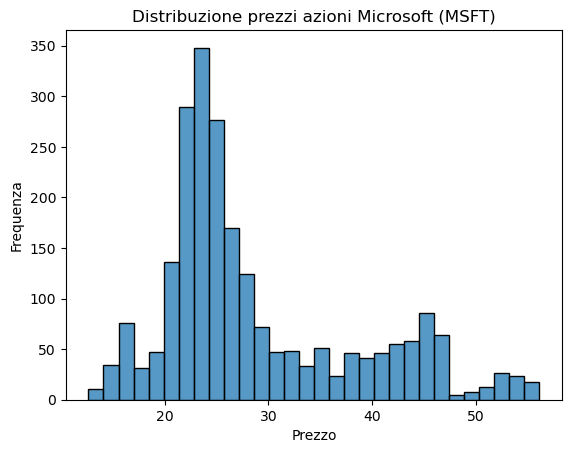

In [17]:
#Creo istogramma che trova il valore delle azioni che Microsoft ha assunto più spesso
import seaborn as sns

sns.histplot(df['MSFT'], bins=30, kde=False)  #bins=30 indica che vogliamo dividere l'intervallo dei prezzi in 30 "contenitori" o intervalli, per raggruppare i dati.
                                              #kde=False disabilita la curva di densità per vedere solo le barre e non una linea di distribuzione continua.
plt.title('Distribuzione prezzi azioni Microsoft (MSFT)')
plt.xlabel('Prezzo')
plt.ylabel('Frequenza')
plt.show()


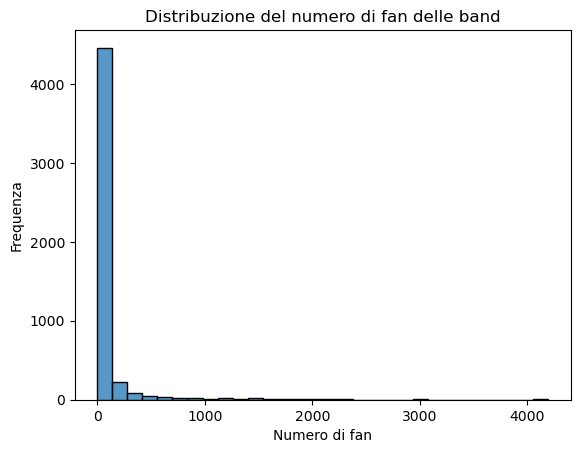

In [19]:
#Esercizi sul dataset 'metal_bands_2017'

#Caricamento dataset
import pandas as pd

df = pd.read_csv('C:\\Users\\alice\\Downloads\\metal_bands_2017.csv', encoding='latin1')

#Istogramma del numero di fan con Seaborn
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['fans'], bins=30, kde=False)

plt.title('Distribuzione del numero di fan delle band')
plt.xlabel('Numero di fan')
plt.ylabel('Frequenza')
plt.show()

In [ ]:
#Deduzione: poche band con moltissimi fan, molte band con pochissimi fan. La scena metal ha molte band piccole e poche molto popolari.

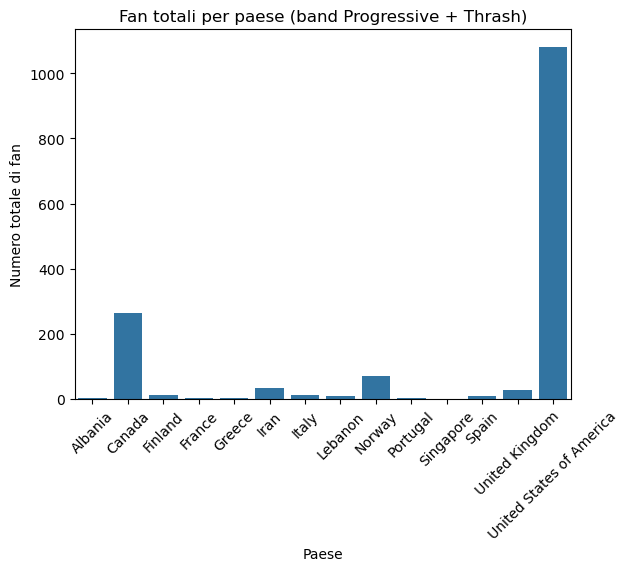

In [22]:
#Barplot per band che suonano sia Progressive che Thrash + somma fan per paese

#Filtro band che contengono sia "Progressive" che "Thrash" nella colonna 'style'
mask = df.loc[:, 'style'].str.contains('Progressive') & df.loc[:, 'style'].str.contains('Thrash')
df_filtered = df.loc[mask]

#Raggruppo per paese e somma fan
fans_per_country = df_filtered.groupby('origin')['fans'].sum().reset_index()

#Barplot
sns.barplot(data=fans_per_country, x='origin', y='fans')

plt.title('Fan totali per paese (band Progressive + Thrash)')
plt.xlabel('Paese')
plt.ylabel('Numero totale di fan')
plt.xticks(rotation=45)
plt.show()


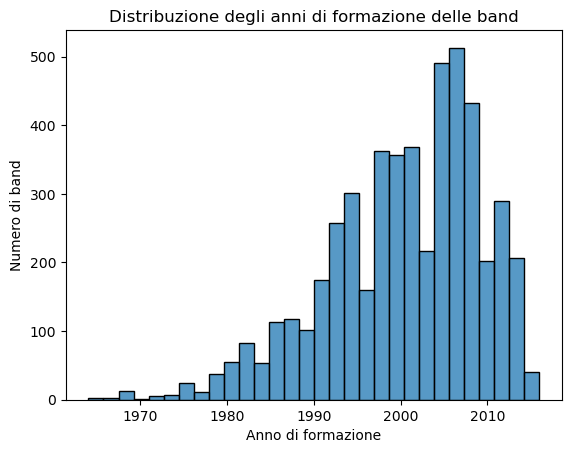

In [25]:
#Istogramma delle date di formazione delle band

#Converto gli anni di formazione 'formed' in int per sicurezza
df['formed_year'] = pd.to_numeric(df['formed'], errors='coerce')   #errors='coerce' converte in NaN i valori che non si riescono a convertire

sns.histplot(df['formed_year'].dropna(), bins=30, kde=False)

plt.title('Distribuzione degli anni di formazione delle band')
plt.xlabel('Anno di formazione')
plt.ylabel('Numero di band')
plt.show()

In [ ]:
#Osservazione: il metal guadagna popolarità all'inizio degli anni '80 e inizia a perderla intorno al 2010

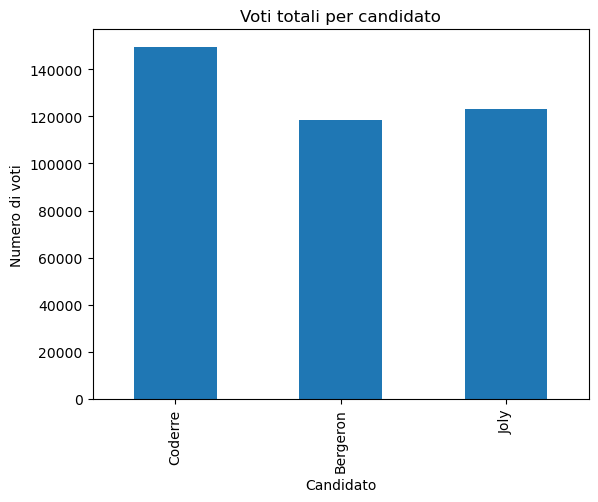

In [28]:
#Esercizi sul dataset 'election.csv'

#Carico il dataset da github
import pandas as pd

url = "https://raw.githubusercontent.com/plotly/datasets/master/election.csv"
df = pd.read_csv(url)

import matplotlib.pyplot as plt   #Grafico a barre: voti totali per i tre candidati (somma su tutti i distretti)

votes_totals = df[['Coderre', 'Bergeron', 'Joly']].sum()   #Sommo i voti per candidato

votes_totals.plot(kind='bar')   #Barplot

plt.title('Voti totali per candidato')
plt.xlabel('Candidato')
plt.ylabel('Numero di voti')
plt.show()


C:\Users\alice\AppData\Local\Temp\ipykernel_8888\1154461549.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top10['votanti'] = top10[['Coderre', 'Bergeron', 'Joly']].sum(axis=1)   # Creo la colonna "votanti" come somma voti candidati


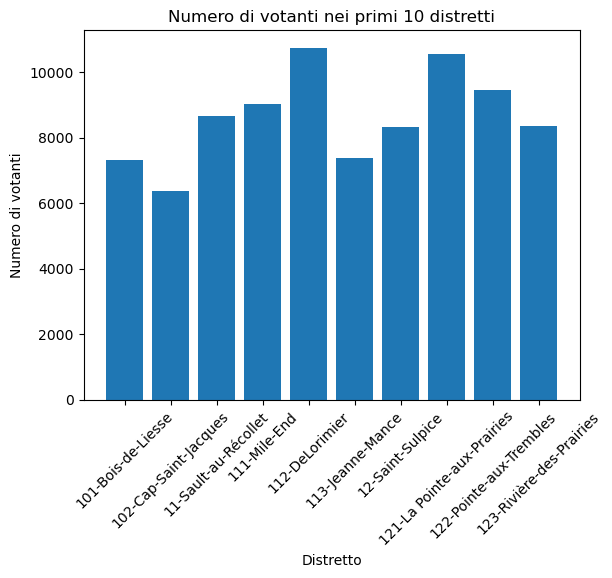

In [29]:
#Grafico a barre: numero di votanti nei primi 10 distretti
top10 = df.head(10)   # Seleziono i primi 10 distretti

top10['votanti'] = top10[['Coderre', 'Bergeron', 'Joly']].sum(axis=1)   # Creo la colonna "votanti" come somma voti candidati

plt.bar(top10['district'], top10['votanti'])   #Barplot

plt.title('Numero di votanti nei primi 10 distretti')
plt.xlabel('Distretto')
plt.ylabel('Numero di votanti')
plt.xticks(rotation=45)
plt.show()


In [32]:
#Esercizi sul dataset 'bar_locations'
import pandas as pd

df = pd.read_csv('C:\\Users\\alice\\Downloads\\bar_locations.csv')
print(df.head())

         Location Type  Incident Zip           City        Borough   Latitude  \
0  Club/Bar/Restaurant       10308.0  STATEN ISLAND  STATEN ISLAND  40.544096   
1  Club/Bar/Restaurant       10012.0       NEW YORK      MANHATTAN  40.729793   
2  Club/Bar/Restaurant       10308.0  STATEN ISLAND  STATEN ISLAND  40.544209   
3  Club/Bar/Restaurant       10034.0       NEW YORK      MANHATTAN  40.866376   
4  Club/Bar/Restaurant       11220.0       BROOKLYN       BROOKLYN  40.635207   

   Longitude  num_calls  
0 -74.141155         40  
1 -73.998842         18  
2 -74.141040         21  
3 -73.928258        160  
4 -74.020285         17  


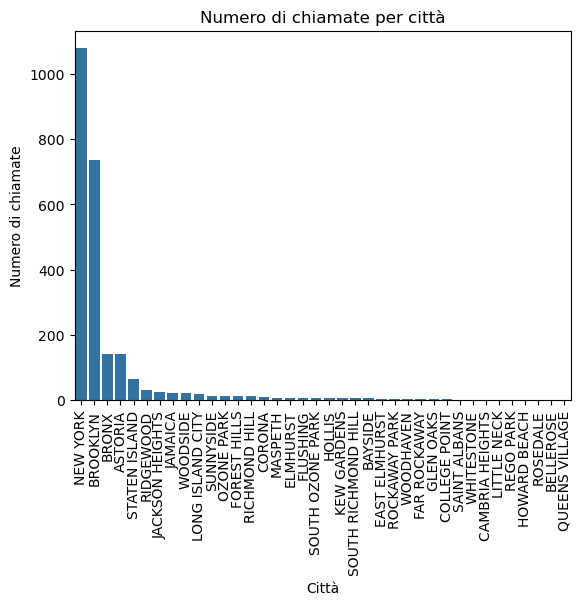

In [38]:
#Grafico chiamate per ogni città (tutti i tipi di locale)
import seaborn as sns
import matplotlib.pyplot as plt

calls_per_city = df['City'].value_counts()

sns.barplot(x=calls_per_city.index, y=calls_per_city.values)

plt.title('Numero di chiamate per città')
plt.xlabel('Città')
plt.ylabel('Numero di chiamate')
plt.xticks(rotation=90)   #Questo serve a mettere in verticale le scritte sull'asse orizzontale, per rendere il grafico più leggibile
plt.show()


In [34]:
#Cerco l'area coperta (rettangolo di latitudine e longitudine del dataset)
min_lat, max_lat = df['Latitude'].min(), df['Latitude'].max()
min_lon, max_lon = df['Longitude'].min(), df['Longitude'].max()

print(f"Latitudine: da {min_lat} a {max_lat}")
print(f"Longitudine: da {min_lon} a {max_lon}")


Latitudine: da 40.51125534606224 a 40.910201355326016
Longitudine: da -74.25127710072611 a -73.70921875550243


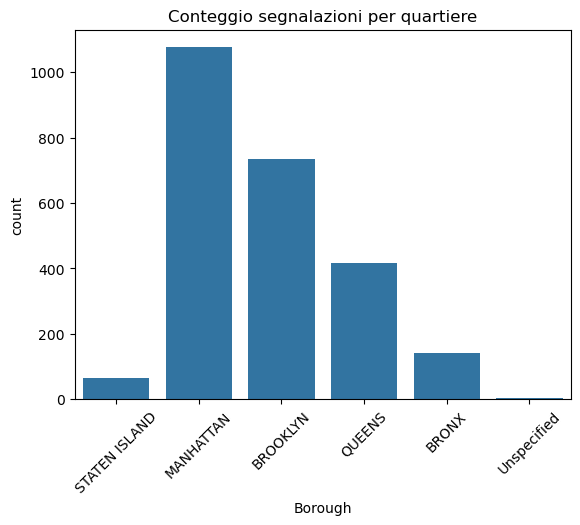

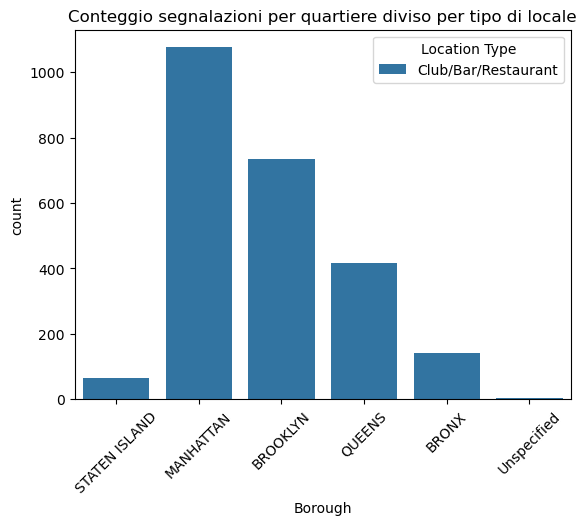

In [37]:
#Creo grafico delle segnalazioni per quartiere sia senza hue che con hue
sns.countplot(data=df, x='Borough')
plt.xticks(rotation=45)
plt.title('Conteggio segnalazioni per quartiere')
plt.show()

sns.countplot(data=df, x='Borough', hue='Location Type')
plt.xticks(rotation=45)
plt.title('Conteggio segnalazioni per quartiere diviso per tipo di locale')
plt.show()
